# install environments

In [ ]:
!pip install pystac_client
!pip install planetary_computer
!pip install leafmap
# !pip install geogif
!pip install stackstac
!pip install dask distributed
!pip install odc.stac
!pip install rasterio
# !pip install dask_gateway
!pip install rioxarray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.8/206.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.7/547.7 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 94.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 842.5/842.5 kB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3

In [ ]:
# !pip install pyroSAR

In [ ]:
# !pip install odc-geo

# load libraries

In [ ]:
import dask
import pystac_client
import pystac

import leafmap
# import geogif
import stackstac

import dask.array as da
import dask.distributed

import geopandas as gpd

from rasterio.features import geometry_mask
import rasterio
from rasterio import features
from rasterio.transform import from_bounds
import rioxarray

from shapely.geometry import box

import xarray as xr

import odc.geo.xr

import os
# start dask cluster
from dask.distributed import Client, LocalCluster
# from odc.stac import configure_rio, stac_load
# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import planetary_computer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# def db_scale(x):
#     return 10 * np.log10(x)

from skimage.util import img_as_ubyte
def db_scale(x):
  mean = np.nanmean(x)  # Use nanmean if there are NoData values
  std = np.nanstd(x)    # Use nanstd if there are NoData values
  vmin = mean - 2 * std
  vmax = mean + 2 * std

  # Apply the stretch
  stretched = np.clip(x, vmin, vmax)  # Clip values outside 2σ range
  stretched = (stretched - vmin) / (vmax - vmin)  # Normalize to [0, 1]
  stretched = img_as_ubyte(stretched)
  return stretched

In [ ]:
import cv2
import numpy as np

def normalize_cv2(arr):
    arr = arr.astype(np.float32)
    norm_arr = cv2.normalize(arr, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    return norm_arr.astype(np.uint8)

# select area

In [ ]:
m = leafmap.Map(center=[66.3291577, -37.8284340], zoom=11, height="800px") # mark1.0
# m = leafmap.Map(center=[66.2528971, -37.5240031], zoom=12, height="800px") # mark1.1
# m = leafmap.Map(center=[66.1213959, -37.7392499], zoom=12, height="800px") # mark1.2
# m = leafmap.Map(center=[65.9897427, -37.8486118], zoom=12, height="800px") # mark1.3
# m = leafmap.Map(center=[65.8164658, -37.9628037], zoom=12, height="800px") # mark1.4
# m = leafmap.Map(center=[65.6643486, -38.0369205], zoom=12, height="800px") # mark1.5
# m = leafmap.Map(center=[65.8539564, -38.2171536], zoom=12, height="800px") # mark1.6

# m = leafmap.Map(center=[62.4776899, -42.9212268], zoom=13, height="800px") # mark5
# m = leafmap.Map(center=[62.4574055, -42.8332964], zoom=13, height="800px") # mark4
# m = leafmap.Map(center=[62.4402846, -42.7274093], zoom=13, height="800px") # mark3
# m = leafmap.Map(center=[62.4160264, -42.6219019], zoom=13, height="800px") # mark6
# m = leafmap.Map(center=[62.3845266, -42.5135630], zoom=13, height="800px") # mark7
# m = leafmap.Map(center=[62.6994187, -43.0282930], zoom=13, height="800px") # mark8
# m = leafmap.Map(center=[62.6774923, -42.8389669], zoom=13, height="800px") # mark9
# m = leafmap.Map(center=[62.6500464, -42.6585083], zoom=13, height="800px") # mark10

m

Map(center=[66.3291577, -37.828434], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title…

In [ ]:
bbox = (m.west, m.south, m.east, m.north)
bbox

(-38.18572998046876, 66.27859884639064, -37.73529052734376, 66.38884885968005)

# image download

## without mask

In [ ]:
import ipyleaflet
import matplotlib.pyplot as plt
import numpy as np
import pystac
import pystac_client
import planetary_computer
import requests
import rich.table

from IPython.display import Image

In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

Choose an area of interest

In [ ]:
bbox = (-38.278427124023445, 66.2187238777389, -37.377548217773445, 66.43926427117198)

(-38.278427124023445, 66.2187238777389, -37.377548217773445, 66.43926427117198)

In [ ]:
# bbox = [-80.11, 8.71, -79.24, 9.38]
search = catalog.search(
    collections=["sentinel-1-rtc"], bbox=bbox, datetime="2022-01-01/2022-01-10"
)
items = search.item_collection()
print(f"Found {len(items)} items")
item = items[2]

Found 4 items


Inspect STAC metadata

In [ ]:
# table = rich.table.Table("key", "value")
# for k, v in sorted(item.properties.items()):
#     table.add_row(k, str(v))

# table

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ key                                   ┃ value                                                       ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ constellation                         │ Sentinel-1                                                  │
│ datetime                              │ 2022-07-22T09:04:05.196034Z                                 │
│ end_datetime                          │ 2022-07-22 09:04:17.695103+00:00                            │
│ platform                              │ SENTINEL-1A                                                 │
│ proj:bbox                             │ [404220.0, 7277330.0, 686920.0, 7491990.0]                  │
│ proj:code                             │ EPSG:32624                                                  │
│ proj:shape                            │ [21466, 28270]                                              │
│ proj:transform                        │ [10.0, 0.0, 404220.0, 0.0, -10.0, 7491990.0, 0.0, 0.0, 1.0] │
│ s1:datatake_id                        │ 345816                                                      │
│ s1:instrument_configuration_ID        │ 7                                                           │
│ s1:orbit_source                       │ PREORB                                                      │
│ s1:processing_level                   │ 1                                                           │
│ s1:product_timeliness                 │ NRT-3h                                                      │
│ s1:resolution                         │ high                                                        │
│ s1:shape                              │ [28270, 21466]                                              │
│ s1:slice_number                       │ 2                                                           │
│ s1:total_slices                       │ 10                                                          │
│ sar:center_frequency                  │ 5.405                                                       │
│ sar:frequency_band                    │ C                                                           │
│ sar:instrument_mode                   │ IW                                                          │
│ sar:looks_azimuth                     │ 1                                                           │
│ sar:looks_equivalent_number           │ 4.4                                                         │
│ sar:looks_range                       │ 5                                                           │
│ sar:observation_direction             │ right                                                       │
│ sar:pixel_spacing_azimuth             │ 10                                                          │
│ sar:pixel_spacing_range               │ 10                                                          │
│ sar:polarizations                     │ ['HH', 'HV']                                                │
│ sar:product_type                      │ GRD                                                         │
│ sar:resolution_azimuth                │ 22                                                          │
│ sar:resolution_range                  │ 20                                                          │
│ sat:absolute_orbit                    │ 44211                                                       │
│ sat:orbit_state                       │ descending                                                  │
│ sat:platform_international_designator │ 2014-016A                                                   │
│ sat:relative_orbit                    │ 39                                                          │
│ start_datetime                        │ 2022-07-22 09:03:52.696966+00:00                            │
└───────────────────────────────────────┴───────

Visualize the assets

In [ ]:
from distributed import Client

client = Client(processes=False)
print(client.dashboard_link)

INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at: inproc://172.28.0.12/924/10
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:45211/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.worker:      Start worker at: inproc://172.28.0.12/924/13
INFO:distributed.worker:         Listening to:          inproc172.28.0.12
INFO:distributed.worker:          Worker name:                          0
INFO:distributed.worker:         dashboard at:          172.28.0.12:42225
INFO:distributed.worker:Waiting to connect to: inproc://172.28.0.12/924/10
INFO:distributed.worker:-------------------------------------------------
INFO:distributed.worker:              Threads:                          2
INFO:distributed.worker:               Memory:                  12.67 GiB
INFO:distributed.worker:      Local Directory: /tmp/dask-scratch-space/worker-mifk2o88
INFO:distributed.worker:------------------------------------------------

http://172.28.0.12:45211/status


In [ ]:
import stackstac

ds = stackstac.stack(items, bounds_latlon=bbox, epsg=32624) #, resolution=1000
ds

<xarray.DataArray 'stackstac-8ac963250219d66a11817d0b3e1c879c' (time: 4,
                                                                band: 2,
                                                                y: 1275, x: 2050)> Size: 167MB
dask.array<fetch_raster_window, shape=(4, 2, 1275, 2050), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates: (12/39)
  * time                                   (time) datetime64[ns] 32B 2022-01-...
    id                                     (time) <U66 1kB 'S1A_IW_GRDH_1SDH_...
  * band                                   (band) <U2 16B 'hh' 'hv'
  * x                                      (x) float64 16kB 5.364e+05 ... 5.5...
  * y                                      (y) float64 10kB 7.364e+06 ... 7.3...
    sar:polarizations                      object 8B {'HV', 'HH'}
    ...                                     ...
    sar:observation_direction              <U5 20B 'right'
    start_datetime                         (time) <U32 512B '2022-01-04 09:12...
    raster:bands                           object 8B {'nodata': -32768, 'data...
    title                                  (band) <U43 344B 'HH: horizontal t...
    description                            (band) <U175 1kB 'Terrain-correcte...
    epsg                                   int64 8B 32624
Attributes:
    spec:           RasterSpec(epsg=32624, bounds=(536382.8532858988, 7351199...
    crs:            epsg:32624
    transform:      | 9.95, 0.00, 536382.85|\n| 0.00,-9.91, 7363830.62|\n| 0....
    resolution_xy:  (9.945908646132, 9.906729595501231)

In [ ]:
vv = ds.sel(band="hh")[0].compute()

The distribution of the raw values is quite skewed. So the values are typically transformed before visualization

In [ ]:
def db_scale(x):
    return 10 * np.log10(x)

In [ ]:
from skimage import img_as_ubyte
img_vv = img_as_ubyte(vv)
img_vv

ValueError: Images of type float must be between -1 and 1.

In [ ]:
mean = np.nanmean(vv)  # Use nanmean if there are NoData values
std = np.nanstd(vv)    # Use nanstd if there are NoData values
vmin = mean - 2 * std
vmax = mean + 2 * std

# Apply the stretch
stretched = np.clip(vv, vmin, vmax)  # Clip values outside 2σ range
stretched = (stretched - vmin) / (vmax - vmin)  # Normalize to [0, 1]
stretched = img_as_ubyte(stretched)

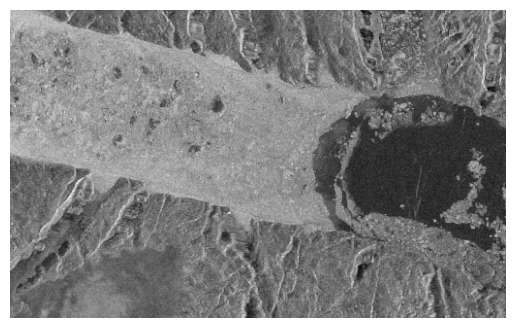

In [ ]:
coarsened = vv.coarsen(x=4, y=4, boundary="trim").max()
img = db_scale(coarsened)

import matplotlib.pyplot as plt
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [ ]:
img = (
    db_scale(vv)
    # vv
    .coarsen(x=4, y=4, boundary="trim")
    .max()
    .plot.imshow(cmap="gray") # , size=12, aspect=1.05, add_colorbar=False
)
# img.axes.set_axis_off();

AttributeError: 'numpy.ndarray' object has no attribute 'coarsen'

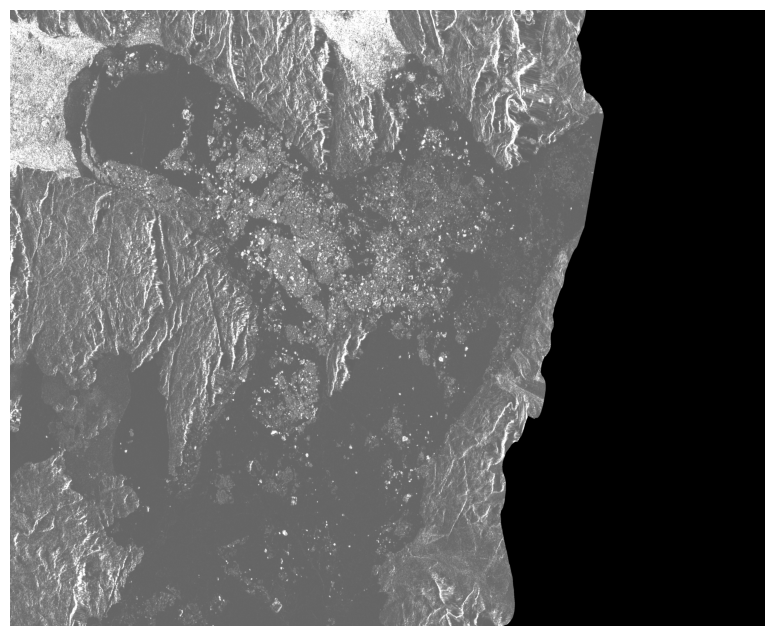

In [ ]:
plt.figure('SAR INPUT', figsize=(10, 8))
plt.imshow(stretched, cmap='gray')
plt.axis('off')
plt.show()

## save as tif

In [ ]:
import rasterio
from rasterio.transform import from_bounds

# Define output file name
output_tif = "sentinel1_processed.tif"

# Compute dB scale for Sentinel-1 RTC data
vv_processed = db_scale(vv).coarsen(x=4, y=4, boundary="trim").max()

# Convert xarray DataArray to numpy array
image_data = vv_processed.values

# Get geospatial metadata (Assumes dataset `ds` has lat/lon bounds)
height, width = image_data.shape
# bounds = ds.attrs["bounds_latlon"]  # Bounding box from `stackstac`
# left, bottom, right, top = bounds

# Check if ds has bounds
if "spatial_ref" in ds.coords:
    bounds = ds.rio.bounds()  # Requires rioxarray
else:
    bounds = bbox  # Fallback to manually defined bbox

# Unpack bounding box
left, bottom, right, top = bounds
bounds

(-38.04702758789063, 66.06569731299918, -37.43179321289063, 66.17687927095935)

In [ ]:
# Create affine transform (maps pixel coordinates to real-world coordinates)
transform = from_bounds(left, bottom, right, top, width, height)

crs = "EPSG:32624"

# Save the image as GeoTIFF
with rasterio.open(
    output_tif,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,  # Single-band image
    dtype=image_data.dtype,
    crs=crs,
    transform=transform,
) as dst:
    dst.write(image_data, 1)  # Write band 1

print(f"Saved processed Sentinel-1 RTC data as {output_tif}")

Saved processed Sentinel-1 RTC data as sentinel1_processed.tif


Approach 2

In [ ]:
# Select the data for the specific time step
single_time_step = vv_processed#.sel(time=time_step)

# Define the output file name, e.g., using the date as the file name
file_name = "sentinel1_processed2.tif"  # Extract date part
output_path =  file_name# os.path.join(output_dir, file_name)

# Save the single time step to a .tif file
single_time_step.rio.to_raster(output_path)

Visualize the saved file

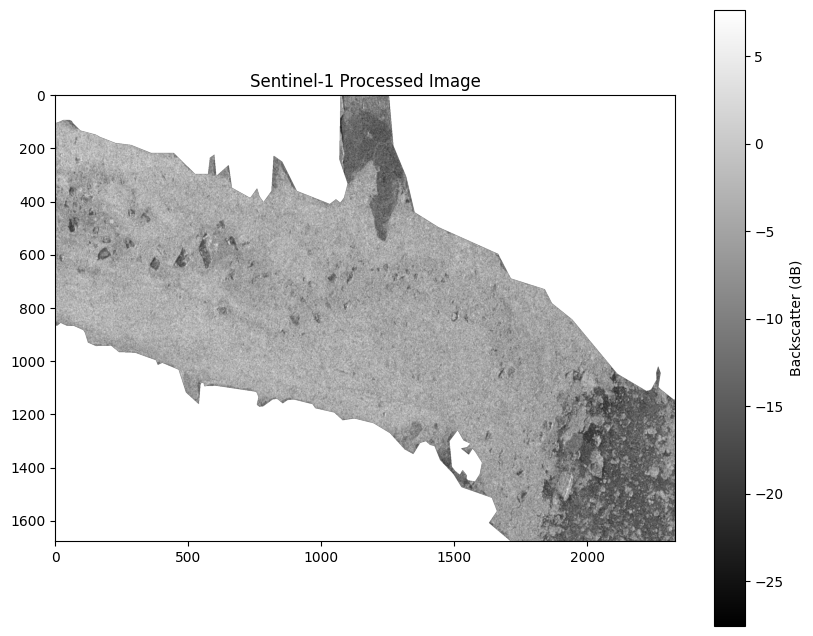

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np

# Load the saved TIFF file
tif_file = "/content/drive/MyDrive/icebergtrack/sentinel1/mark6/2022-05-04.tif"

with rasterio.open(tif_file) as src:
    image_data = src.read(1)  # Read first band
    transform = src.transform  # Get georeferencing info

# Convert to dB scale (optional, if raw values are not in dB)
# image_data = 10 * np.log10(np.maximum(image_data, 1e-10))

# Plot the image
plt.figure(figsize=(10, 8))
plt.imshow(image_data, cmap="gray")  # Use "gray" colormap for SAR images
plt.colorbar(label="Backscatter (dB)")
plt.title("Sentinel-1 Processed Image")
# plt.axis("off")
plt.show()

In [ ]:
transform

Affine(45.867712561599745, 0.0, -264008.820040498,
       0.0, -52.50231908135581, 7444179.129538029)

## mask out land pipeline

In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [ ]:
search = catalog.search(
    collections=["sentinel-1-rtc"], bbox=bbox, datetime="2022-07-01/2022-07-31"
)
items = search.item_collection()
print(f"Found {len(items)} items")

Found 7 items


In [ ]:
ds = stackstac.stack(items, bounds_latlon=bbox, epsg=32624)

In [ ]:
## Step 1: Read and Reproject the Shapefile
shapefile = gpd.read_file('/content/drive/MyDrive/icebergtrack/fjords_epsg32627/fjords_epsg32627.shp')
shapefile = shapefile.to_crs(epsg=32624)
print(shapefile.crs)
print(ds.rio.crs)

EPSG:32624
EPSG:32624


In [ ]:
# Create a bounding box from raster bounds
raster_bbox = box(*ds.rio.bounds())
shapefile_clipped = shapefile.clip(raster_bbox)

In [ ]:
hh = ds.sel(band="hh")[0]

In [ ]:
# Step 2: Rasterize the Land Geometry
# Define the transform and shape based on the stacked data
transform = ds.rio.transform()  # Affine transform of the data
out_shape = (hh.sizes['y'], hh.sizes['x'])  # Shape of the data grid

In [ ]:
# Create a mask where land areas are True
land_mask = features.rasterize(
    [(geom, 1) for geom in shapefile_clipped.geometry],
    # [(geom, 1) for geom in shapefile.geometry],
    out_shape=out_shape,
    transform=transform,
    fill=0,
    dtype='uint8'
)

In [ ]:
land_mask_da = xr.DataArray(
    land_mask,
    dims=('y', 'x'),
    coords={'y': hh['y'], 'x': hh['x']}
)

In [ ]:
land_mask_da

<xarray.DataArray (y: 1308, x: 2820)> Size: 4MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
Coordinates:
  * y        (y) float64 10kB 7.341e+06 7.341e+06 ... 7.328e+06 7.328e+06
  * x        (x) float64 23kB 5.429e+05 5.43e+05 5.43e+05 ... 5.71e+05 5.71e+05

In [ ]:
hh_masked = hh.where(land_mask_da == 1)

In [ ]:
hh_masked.compute()

<xarray.DataArray 'stackstac-681ed9db57189faa8e447edfdb40e1cf' (y: 1298, x: 2351)> Size: 24MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates: (12/39)
    time                                   datetime64[ns] 8B 2022-07-03T09:12...
    id                                     <U66 264B 'S1A_IW_GRDH_1SDH_202207...
    band                                   <U2 8B 'hh'
  * x                                      (x) float64 19kB 5.453e+05 ... 5.6...
  * y                                      (y) float64 10kB 7.34e+06 ... 7.32...
    end_datetime                           <U32 128B '2022-07-03 09:12:29.451...
    ...                                     ...
    sar:looks_range                        int64 8B 5
    sat:absolute_orbit                     int64 8B 43934
    description                            <U175 700B 'Terrain-corrected gamm...
    raster:bands                           object 8B {'nodata': -32768, 'data...
    title                                  <U43 172B 'HH: horizontal transmit...
    epsg                                   int64 8B 32624
Attributes:
    spec:           RasterSpec(epsg=32624, bounds=(545281.0731267318, 7327597...
    crs:            epsg:32624
    transform:      | 9.95, 0.00, 545281.07|\n| 0.00,-9.91, 7340454.61|\n| 0....
    resolution_xy:  (9.945484398685535, 9.905371258416082)

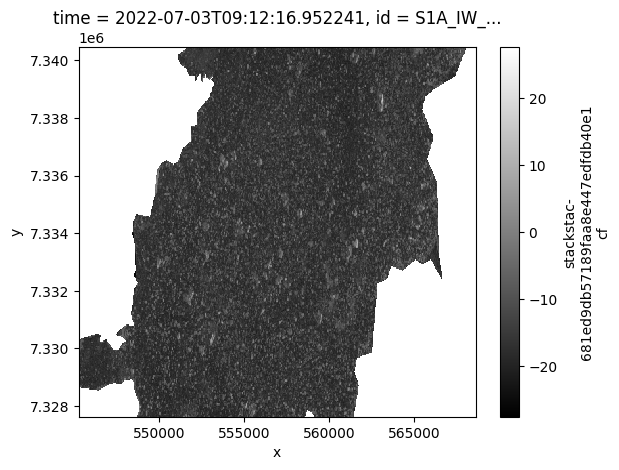

In [ ]:
img = (
    db_scale(hh_masked) # range(-30,30)
    # hh_masked #range(0,40)
    .coarsen(x=4, y=4, boundary="trim")
    .max()
    .plot.imshow(cmap="gray") # , size=12, aspect=1.05, add_colorbar=False
)

In [ ]:
import rasterio
from rasterio.transform import from_bounds

In [ ]:
# Define output file name
output_tif = "/content/drive/MyDrive/icebergtrack/2022-07-03.tif"

# Compute dB scale for Sentinel-1 RTC data
# vv_processed = db_scale(hh_masked).coarsen(x=4, y=4, boundary="trim").max()
vv_processed = hh_masked.coarsen(x=4, y=4, boundary="trim").max()

# Convert xarray DataArray to numpy array
image_data = vv_processed.values

# Get geospatial metadata (Assumes dataset `ds` has lat/lon bounds)
height, width = image_data.shape
bounds = hh_masked.attrs["spec"].bounds #ds.attrs["bounds_latlon"]  # Bounding box from `stackstac`
# left, bottom, right, top = bounds

# # Check if ds has bounds
# if "spatial_ref" in ds.coords:
#     bounds = ds.rio.bounds()  # Requires rioxarray
# else:
#     bounds = bbox  # Fallback to manually defined bbox

# Unpack bounding box
left, bottom, right, top = bounds

# Create affine transform (maps pixel coordinates to real-world coordinates)
transform = from_bounds(left, bottom, right, top, width, height)

crs = "EPSG:32624"

# Save the image as GeoTIFF
with rasterio.open(
    output_tif,
    "w",
    driver="GTiff",
    height=height,
    width=width,
    count=1,  # Single-band image
    dtype=image_data.dtype,
    crs=crs,
    transform=transform,
) as dst:
    dst.write(image_data, 1)  # Write band 1

print(f"Saved processed Sentinel-1 RTC data as {output_tif}")

Saved processed Sentinel-1 RTC data as /content/drive/MyDrive/icebergtrack/2022-07-03.tif


In [ ]:
print(hh_masked.attrs["spec"].bounds)         # RasterSpec details

(545281.0731267318, 7327597.442125881, 568662.9069480415, 7340454.6140193045)


In [ ]:
vv_processed.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
from osgeo import gdal

In [ ]:
data = gdal.Open('/content/drive/MyDrive/icebergtrack/2022-07-03.tif')
gt = data.GetGeoTransform()
gt

(545281.0731267318,
 39.83276630546803,
 0.0,
 7340454.6140193045,
 0.0,
 -39.68262930068958)

In [ ]:
data = gdal.Open('/content/drive/MyDrive/icebergtrack/s1_rtc_rename/S1A_IW_GRDH_1SDH_20240809T091233_20240809T091258_055134_06B802_rtc.tif')
gt = data.GetGeoTransform()
gt

(532745.0, 10.0, 0.0, 7382235.0, 0.0, -10.0)

## loop for multiple images

In [ ]:
bbox = (-38.18572998046876, 66.27859884639064, -37.73529052734376, 66.38884885968005)

In [ ]:
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    modifier=planetary_computer.sign_inplace,
)

In [ ]:
search = catalog.search(
    collections=["sentinel-1-rtc"], bbox=bbox, datetime="2020-08-01/2020-12-31"
)
items = search.item_collection()
print(f"Found {len(items)} items")

Found 95 items


In [ ]:
ds = stackstac.stack(items, bounds_latlon=bbox, epsg=32624)

mask out the land

In [ ]:
## Step 1: Read and Reproject the Shapefile
shapefile = gpd.read_file('/content/drive/MyDrive/icebergtrack/fjords_epsg32627/fjords_epsg32627.shp')
shapefile = shapefile.to_crs(epsg=32624)

In [ ]:
# Create a bounding box from raster bounds
raster_bbox = box(*ds.rio.bounds())
shapefile_clipped = shapefile.clip(raster_bbox)

In [ ]:
hh = ds.sel(band="hh")

In [ ]:
# Step 2: Rasterize the Land Geometry
# Define the transform and shape based on the stacked data
transform = ds.rio.transform()  # Affine transform of the data
out_shape = (hh.sizes['y'], hh.sizes['x'])  # Shape of the data grid

In [ ]:
# Create a mask where land areas are True
land_mask = features.rasterize(
    [(geom, 1) for geom in shapefile_clipped.geometry],
    # [(geom, 1) for geom in shapefile.geometry],
    out_shape=out_shape,
    transform=transform,
    fill=0,
    dtype='uint8'
)

In [ ]:
land_mask_da = xr.DataArray(
    land_mask,
    dims=('y', 'x'),
    coords={'y': hh['y'], 'x': hh['x']}
)

In [ ]:
# Expand dimensions to match the data array (time and band)
land_mask_da = land_mask_da.expand_dims({'time': hh['time']})#, 'band': hh['band']})

In [ ]:
hh_masked = hh.where(land_mask_da == 1)

Pull out imagery

In [ ]:
# hh_masked.compute()
hh.compute()

<xarray.DataArray 'stackstac-217717b485b617cef1c09b86b6167d21' (time: 95,
                                                                y: 1289, x: 2051)> Size: 2GB
array([[[       nan,        nan,        nan, ..., 0.07957109,
         0.04682023, 0.02367667],
        [       nan,        nan,        nan, ..., 0.03579456,
         0.02481732, 0.02113058],
        [       nan,        nan,        nan, ..., 0.03579456,
         0.01832371, 0.01118739],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[0.09338643, 0.10364716, 0.11170954, ...,        nan,
                nan,        nan],
        [0.1702622 , 0.09689727, 0.12959307, ...,        nan,
                nan,        nan],
        [0.21747516, 0.13855089, 0.15975118, ...,        nan,
                nan,        nan],
...
        [0.04614318, 0.04898822, 0.09437191, ..., 0.02688214,
         0.02454865, 0.02208971],
        [0.06704035, 0.04699798, 0.06961986, ..., 0.03772592,
         0.04559571, 0.03927292],
        [0.08553898, 0.0649258 , 0.05958837, ..., 0.04400611,
         0.04516201, 0.03886032]],

       [[0.82399523, 0.64175785, 0.41830429, ...,        nan,
                nan,        nan],
        [0.92908335, 0.80111074, 0.65384603, ...,        nan,
                nan,        nan],
        [0.99926025, 0.94355369, 0.9614352 , ...,        nan,
                nan,        nan],
        ...,
        [0.08734318, 0.04979202, 0.05045744, ...,        nan,
                nan,        nan],
        [0.06039926, 0.03776633, 0.0569698 , ...,        nan,
                nan,        nan],
        [0.06071331, 0.02510612, 0.05766653, ...,        nan,
                nan,        nan]]])
Coordinates: (12/39)
  * time                                   (time) datetime64[ns] 760B 2020-08...
    id                                     (time) <U66 25kB 'S1B_IW_GRDH_1SDH...
    band                                   <U2 8B 'hh'
  * x                                      (x) float64 16kB 5.364e+05 ... 5.5...
  * y                                      (y) float64 10kB 7.364e+06 ... 7.3...
    s1:product_timeliness                  <U8 32B 'Fast-24h'
    ...                                     ...
    s1:datatake_id                         (time) <U6 2kB '176793' ... '275713'
    constellation                          <U10 40B 'Sentinel-1'
    description                            <U175 700B 'Terrain-corrected gamm...
    title                                  <U43 172B 'HH: horizontal transmit...
    raster:bands                           object 8B {'nodata': -32768, 'data...
    epsg                                   int64 8B 32624
Attributes:
    spec:           RasterSpec(epsg=32624, bounds=(536383.2533618422, 7351192...
    crs:            epsg:32624
    transform:      | 9.94, 0.00, 536383.25|\n| 0.00,-9.80, 7363825.05|\n| 0....
    resolution_xy:  (9.944809651472898, 9.800087629817233)

save as tif file

In [ ]:
output_dir = "/content/drive/MyDrive/icebergtrack/sentinel1/hh/sermilik/"  # Specify your output directory
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists

# Iterate over the time dimension and save each time step as a separate .tif
for i, time_step in enumerate(hh_masked.time):

    # Select the data for the specific time step
    single_time_step = db_scale(hh_masked).sel(time=time_step)

    # Define the output file name, e.g., using the date as the file name
    file_name = f"{str(time_step.values).split('T')[0]}.tif"  # Extract date part
    output_path = os.path.join(output_dir, file_name)

    # Save the single time step to a .tif file
    single_time_step.rio.to_raster(output_path)

save as jpg file

In [ ]:
import os
import numpy as np
import rioxarray as rxr
from PIL import Image

output_dir = "/content/drive/MyDrive/icebergtrack/sentinel1/hh/mark1.0_glac_img/"  # New output directory for JPGs
os.makedirs(output_dir, exist_ok=True)  # Ensure the directory exists


# stretch
for i, time_step in enumerate(hh_masked.time):
    # Select the data for the specific time step (2D array)
    single_time_step = hh_masked.sel(time=time_step)

    # Apply db-scale stretch (returns uint8 numpy array)
    stretched = db_scale(single_time_step.values)

    # Convert to PIL image
    img = Image.fromarray(stretched)

    # Define the output file name (extract date)
    file_name = f"{str(time_step.values).split('T')[0]}.jpg"
    output_path = os.path.join(output_dir, file_name)

    # Save the image
    img.save(output_path, "JPEG")